# Missing Indicator

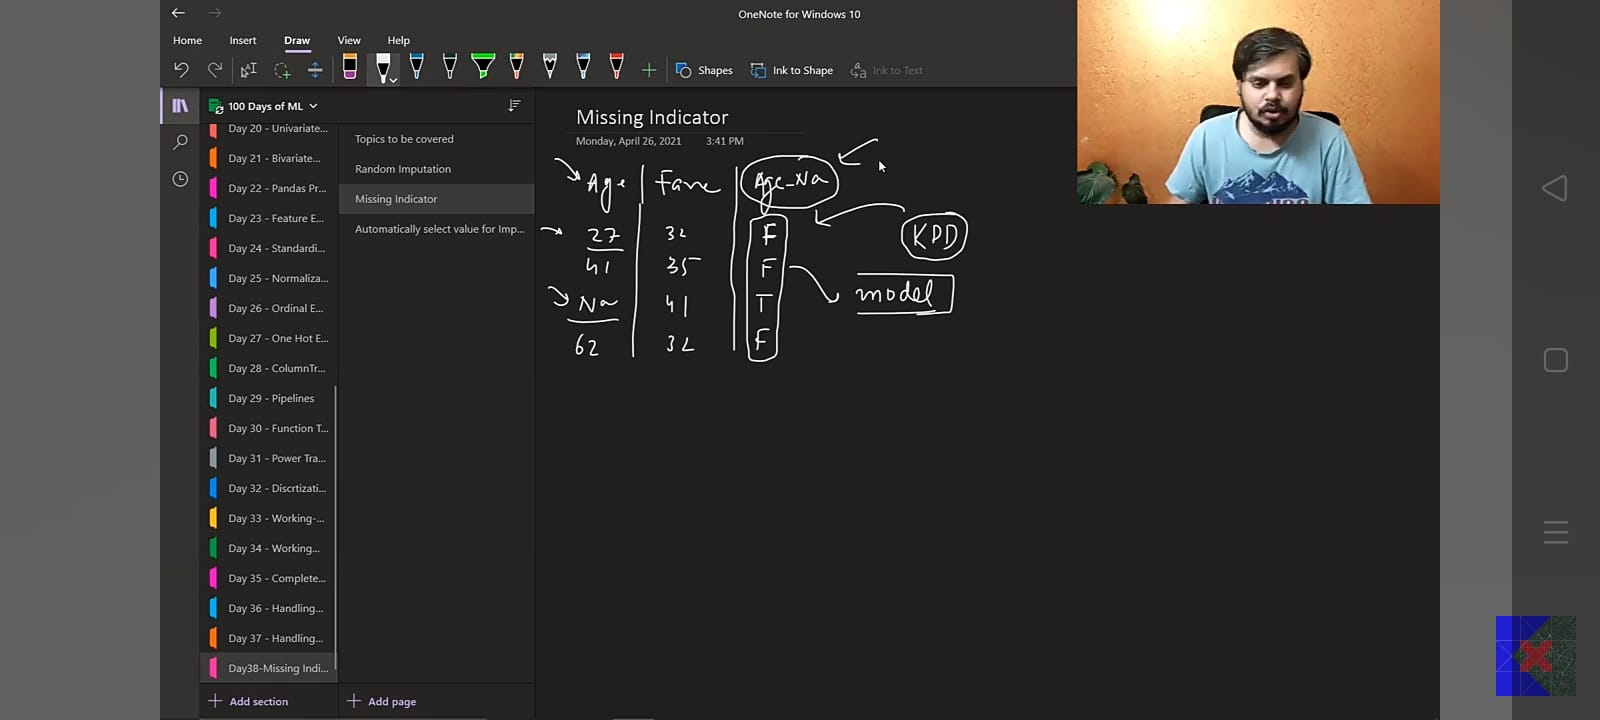

In [65]:
from PIL import Image
import IPython.display
import pandas as pd
import numpy as np

img = Image.open(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\missing_indiactor.jpeg")
display(img)

In [66]:
df = pd.read_csv(r"C:\Users\Admin\Documents\Jupyter Notebook\Machine Learning (CampusX)\Dataset\train.csv",usecols=['Fare','Age','Survived'])

In [67]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [68]:
X = df.drop('Survived',axis=1)
y = df['Survived']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [70]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

from sklearn.metrics import accuracy_score
print("accuracy_score: ",accuracy_score(y_test,y_pred))

accuracy_score:  0.6902985074626866


In [73]:
from sklearn.impute import MissingIndicator
mi = MissingIndicator()

In [74]:
mi.fit(X_train)

MissingIndicator()

In [75]:
X_train_trf1 = mi.transform(X_train)
X_test_trf1 = mi.transform(X_test)

In [76]:
mi.features_

array([0], dtype=int64)

In [77]:
X_train_trf1

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

In [78]:
X_train['Age_NA'] = X_train_trf1
X_test['Age_NA'] = X_test_trf1

In [79]:
X_train

,Age,Fare,Age_NA
857,51.0,26.5500,False
52,49.0,76.7292,False
386,1.0,46.9000,False
124,54.0,77.2875,False
578,NaN,14.4583,True
...,...,...,...
835,39.0,83.1583,False
192,19.0,7.8542,False
629,NaN,7.7333,True
559,36.0,17.4000,False


In [80]:
si = SimpleImputer()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [81]:
lr1 = LogisticRegression()

lr1.fit(X_train_trf2,y_train)

y_pred2 = lr1.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
print("accuracy_score: ",accuracy_score(y_test,y_pred2))

accuracy_score:  0.6940298507462687


### Using SimpleImputer

In [82]:
si2 = SimpleImputer(add_indicator=True)

In [83]:
X_train1 = si2.fit_transform(X_train)
X_test1 = si2.transform(X_test)

In [84]:
lr2 = LogisticRegression()

lr2.fit(X_train1,y_train)

y_pred3 = lr2.predict(X_test1)

from sklearn.metrics import accuracy_score
print("accuracy_score: ",accuracy_score(y_test,y_pred3))

accuracy_score:  0.6940298507462687


In [85]:
X_train1

array([[51.        , 26.55      ,  0.        ,  0.        ],
       [49.        , 76.7292    ,  0.        ,  0.        ],
       [ 1.        , 46.9       ,  0.        ,  0.        ],
       ...,
       [29.91533865,  7.7333    ,  1.        ,  1.        ],
       [36.        , 17.4       ,  0.        ,  0.        ],
       [60.        , 39.        ,  0.        ,  0.        ]])